# Chapter 3: Summarizing data

In [1]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import localconverter
# import NHANES package
base = importr('NHANES')

with localconverter(ro.default_converter + pandas2ri.converter):
  NHANES = ro.conversion.rpy2py(ro.r['NHANES'])

 
NHANES = NHANES.drop_duplicates(subset='ID')


## Table 3.1

In [2]:
pd.DataFrame(NHANES.PhysActive.value_counts(dropna=False))



,PhysActive
Yes,2972
No,2473
NaN,1334


## Table 3.2

In [3]:
table_df = NHANES.stb.freq(['PhysActive']).drop(
    ['cumulative_count', 'cumulative_percent'], axis=1)
table_df['RelativeFrequency'] = table_df.percent / 100
table_df = table_df.rename(columns={
    'count': 'AbsoluteFrequency',
    'percent': 'Percentage'})
table_df.style.hide(axis="index")

PhysActive,AbsoluteFrequency,Percentage,RelativeFrequency
Yes,2972,54.582185,0.545822
No,2473,45.417815,0.454178


## Table 3.3

In [4]:
NHANES_sleep = NHANES.query('SleepHrsNight > 0')
table_df = NHANES_sleep.stb.freq(
    ['SleepHrsNight'])
table_df['RelativeFrequency'] = table_df.percent / 100
table_df = table_df.rename(columns={
    'count': 'AbsoluteFrequency',
    'percent': 'Percentage'}).sort_values(by='SleepHrsNight').drop(
    ['cumulative_count', 'cumulative_percent'], axis=1)

table_df.style.hide(axis="index")

SleepHrsNight,AbsoluteFrequency,Percentage,RelativeFrequency
2,9,0.178749,0.001787
3,49,0.973188,0.009732
4,200,3.972195,0.039722
5,406,8.063555,0.080636
6,1172,23.277061,0.232771
7,1394,27.686197,0.276862
8,1405,27.904667,0.279047
9,271,5.382324,0.053823
10,97,1.926514,0.019265
11,15,0.297915,0.002979


## Figure 3.2

<AxesSubplot: xlabel='SleepHrsNight', ylabel='Density'>

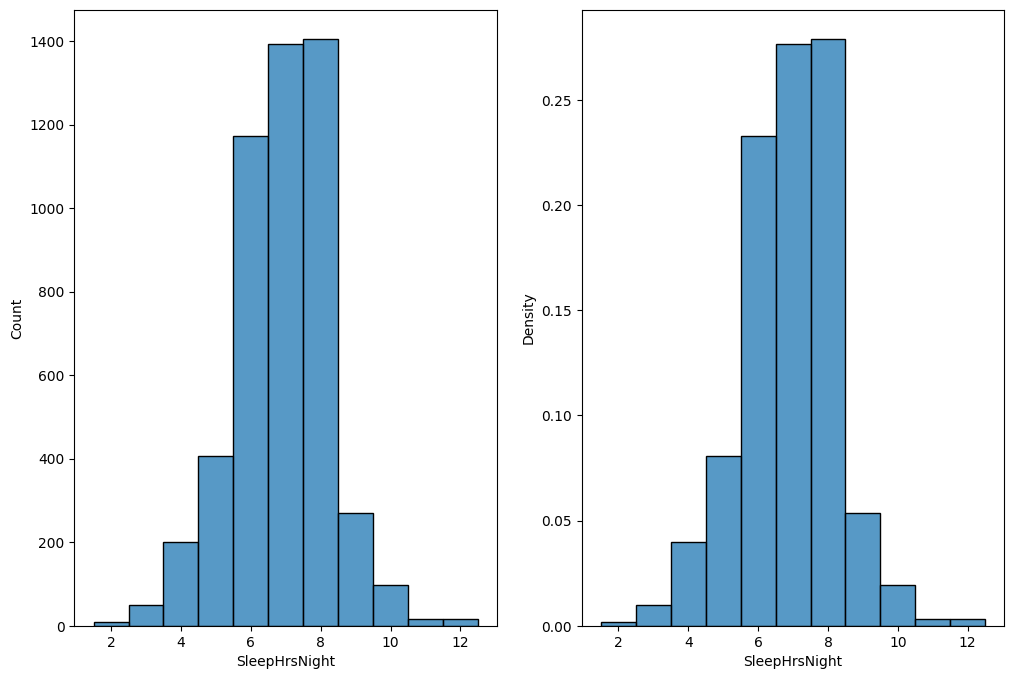

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

sns.histplot(NHANES_sleep.SleepHrsNight, ax=ax[0], discrete=True)
sns.histplot(NHANES_sleep.SleepHrsNight, ax=ax[1], stat='density', discrete=True)


## Figure 3.3

<AxesSubplot: xlabel='SleepHrsNight', ylabel='Density'>

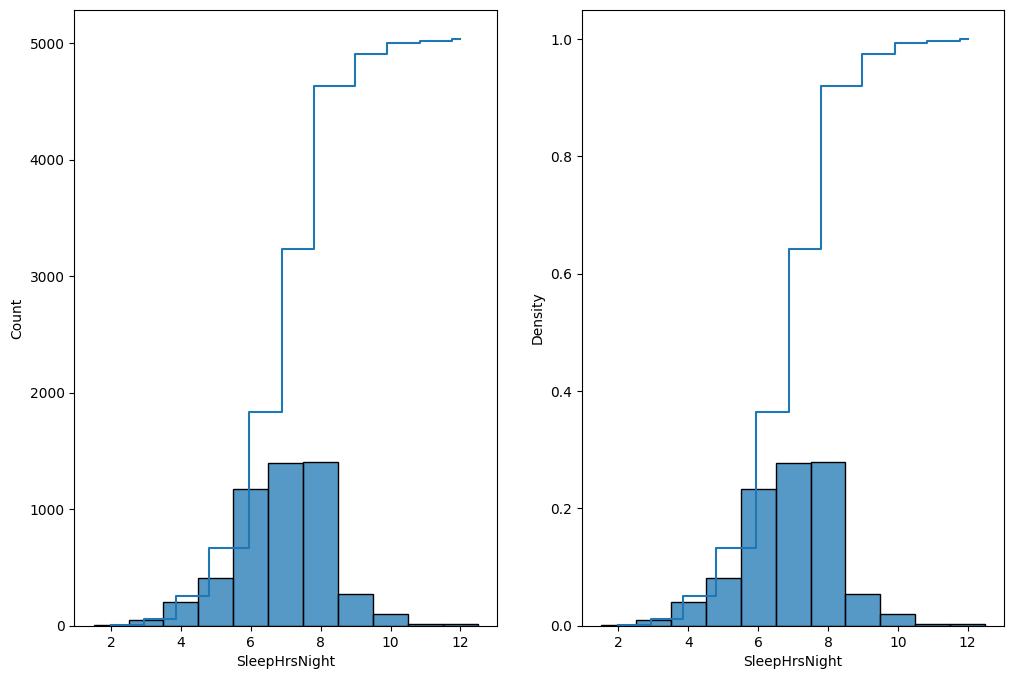

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

sns.histplot(NHANES_sleep.SleepHrsNight, ax=ax[0],
             element="step", fill=False, cumulative=True, )
sns.histplot(NHANES_sleep.SleepHrsNight,  ax=ax[0], discrete=True)

sns.histplot(NHANES_sleep.SleepHrsNight, ax=ax[1], stat='density',
             element="step", fill=False, cumulative=True, )
sns.histplot(NHANES_sleep.SleepHrsNight, ax=ax[1], stat='density', discrete=True)


## Figure 3.4

<AxesSubplot: xlabel='Height', ylabel='Count'>

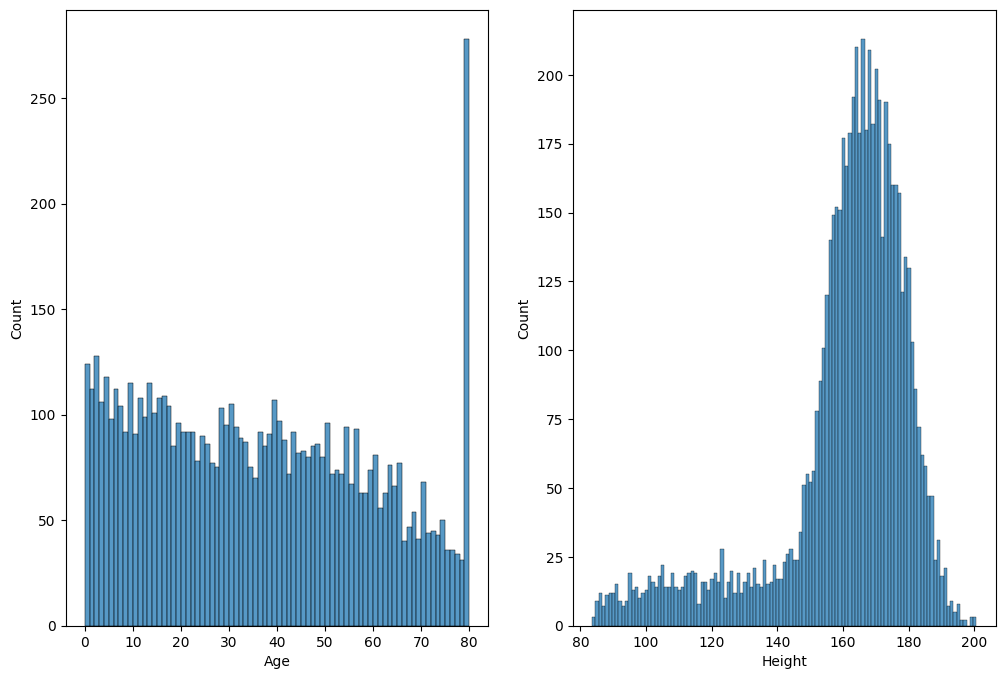

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

sns.histplot(NHANES.Age, binwidth=1, ax=ax[0])

sns.histplot(NHANES.Height, binwidth=1, ax=ax[1])

## Figure 3.5

Text(0.5, 1.0, 'B. Adults only (bin width=.1)')

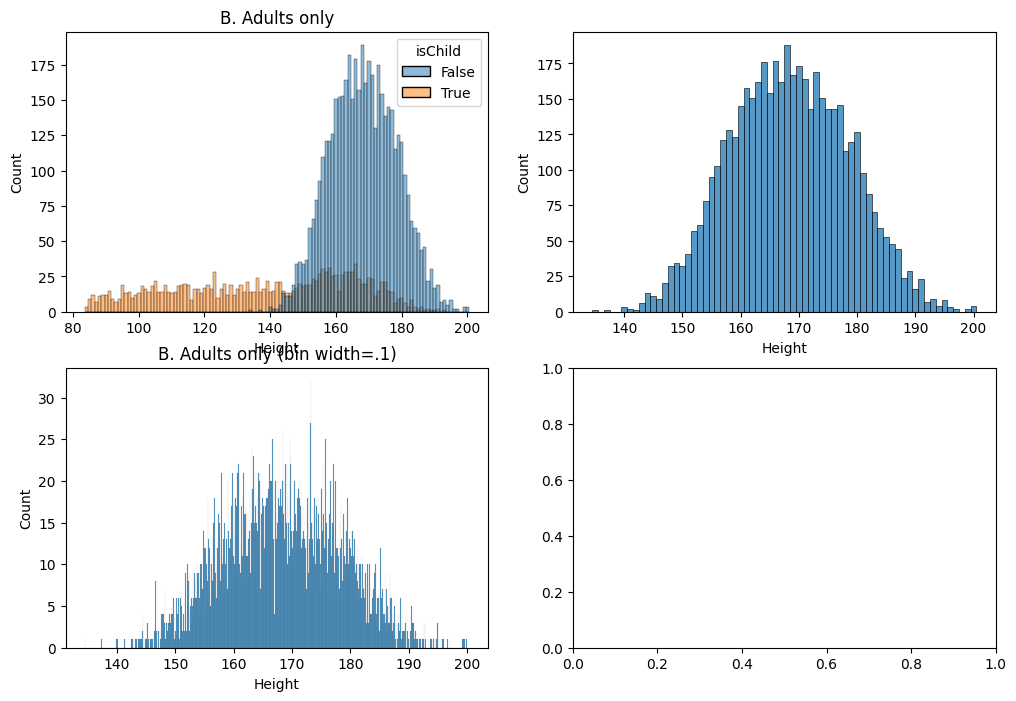

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

NHANES['isChild'] = NHANES.Age < 18
NHANES_adult = NHANES.dropna(subset=['Age', 'Height']).query('Age > 17')

sns.histplot(NHANES, x='Height', hue='isChild', binwidth=1, ax=ax[0][0])
ax[0][0].set_title('A. All individuals')

sns.histplot(NHANES_adult, x='Height',  binwidth=1, ax=ax[0][1])
ax[0][0].set_title('B. Adults only')

sns.histplot(NHANES_adult, x='Height',  binwidth=.1, ax=ax[1][0])
ax[1][0].set_title('B. Adults only (bin width=.1)')


## Table 3.5

In [10]:
NHANES_adult['Height'][44:50]

96     169.6
97     169.8
101    167.5
102    155.2
104    173.8
107    174.5
Name: Height, dtype: float64

## Figure 3.6

In [11]:
# first update the summary to include the mean and standard deviation of each
# dataset
# NOTE: some NA values get turned into large negative numbers in the conversion from R, so remove those

pulsedata = NHANES_adult.dropna(subset=['Pulse']).query('Pulse > 0')[['Pulse']]
heightdata = NHANES_adult.dropna(subset=['Height']).query('Height > 0')[['Height']]

pulse_summary = pulsedata.describe()
pulse_summary.loc['binwidth'] = np.diff(np.histogram_bin_edges(pulsedata.Pulse, 'fd'))[0]

height_summary = heightdata.describe()
height_summary.loc['binwidth'] = np.diff(np.histogram_bin_edges(heightdata.Height, 'fd'))[0]



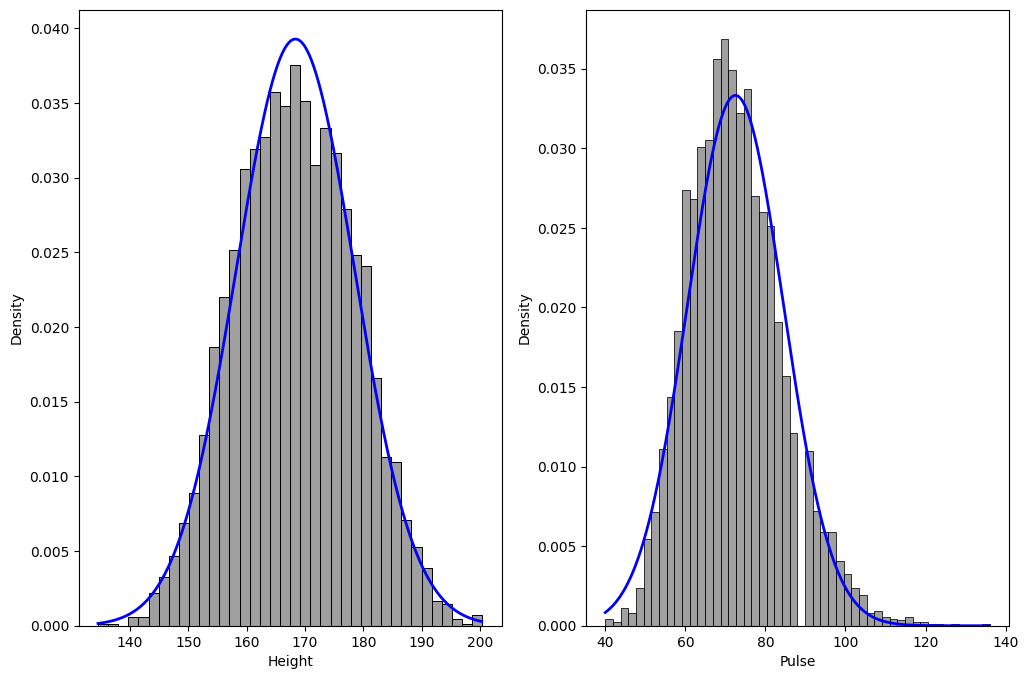

In [12]:

heightDist = pd.DataFrame({'x': np.arange(height_summary.loc['min'][0], height_summary.loc['max'][0], .1)})
heightDist['norm'] = norm.pdf(
    heightDist.x, height_summary.loc['mean'][0], height_summary.loc['std'])

pulseDist = pd.DataFrame({'x': np.arange(pulse_summary.loc['min'][0], pulse_summary.loc['max'][0], .1)})
pulseDist['norm'] = norm.pdf(
    pulseDist.x, pulse_summary.loc['mean'][0], pulse_summary.loc['std'])

fig, ax = plt.subplots(1, 2, figsize=(12,8))

sns.histplot(heightdata.Height, stat='density', binwidth=height_summary.loc['binwidth'][0], color='gray', ax=ax[0])
ax[0].plot(heightDist.x, heightDist.norm, lw=2, color='b')

sns.histplot(pulsedata.Pulse, stat='density', binwidth=pulse_summary.loc['binwidth'][0], color='gray', ax=ax[1])
ax[1].plot(pulseDist.x, pulseDist.norm, lw=2, color='b')

## Figure 3.7

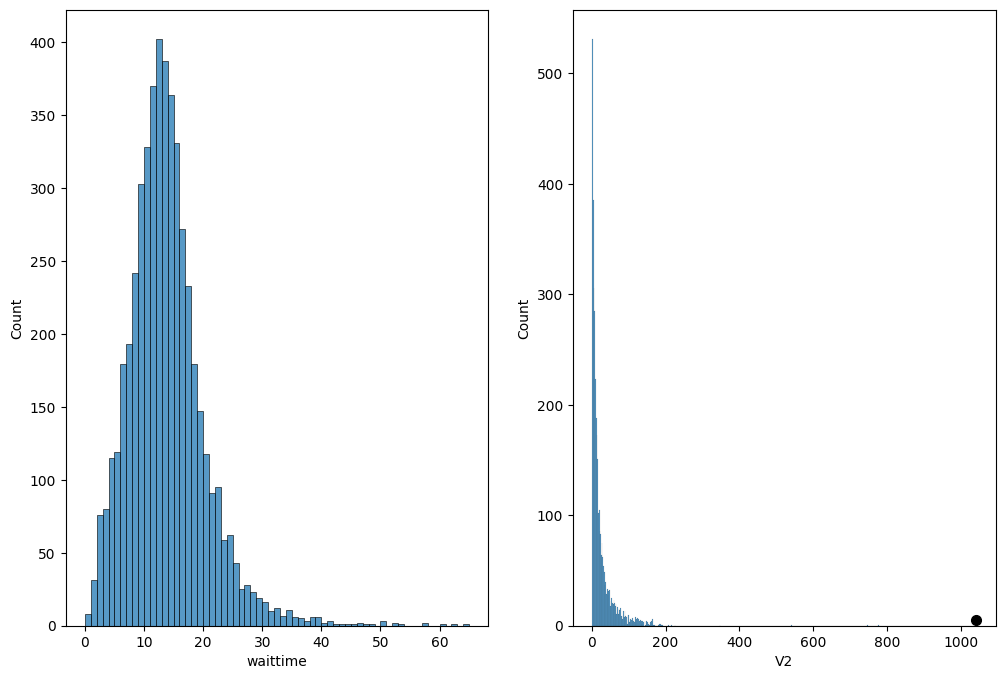

In [13]:
waittimes = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/04/sfo_wait_times_2017.csv')

fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.histplot(waittimes.waittime, binwidth=1, ax=ax[0])

fbdata = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/04/facebook_combined.txt', names=['V1', 'V2'], delimiter=' ')
friends_table = fbdata.groupby('V1').count()
sns.histplot(friends_table.V2, binwidth=2, ax=ax[1])
plt.plot([friends_table.max()['V2']], [5], marker='.', markersize=14, color='k')